In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Métodos de evaluación 

Por ahora hemos visto que:
    
- Se necesita **separar de forma aleatoria** en datos de entrenamiento y testeo para poder evaluar performance del algoritmo
- Existen diversas **métricas para evaluar rendimiento**, y elegimos la nuestra según las caracteristicas de nuestro problema
- Es útil **apoyar la evaluación con visualizaciones de errores**, como por ejemplo scatterplots de residuales

Sin embargo nuestro método hasta ahora tiene una falla. Este depende de la forma en que fueron elegidos nuestros datos de forma aleatoria:

- Podemos tener suerte y caer en un train set y test set que sea ideal para nuestro modelo.
- Podemos tener pésima performance con esa separación de datos pero no en otros.

** Controlar la aleatoridad en train_test_split**

train_test_split separa cada vez que lo llamamos los datos de forma diferente. Para poder comparar modelos, hacer un código más limpio y compacto y para poder hacer nuestros experimentos reproducibles utilizaremos el parametro *random_state*.

In [4]:
X = pd.read_csv('intermediate_results/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [5]:
X.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0
2,300000000.0,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0
3,275000000.0,2012.0,2.35,164.0,106759.0,250000000.0,8.5,160887295.0,4404.0
4,275000000.0,2013.0,2.35,150.0,45757.0,215000000.0,6.5,29210849.0,3904.0


In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)

In [7]:
X_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
1724,20000000.0,2004.0,1.85,99.0,1189.0,40000000.0,4.8,6160886.0,2445.0
2027,14000000.0,1998.0,2.35,99.0,3500.0,14000000.0,5.5,10515444.0,2257.0
1843,18000000.0,2008.0,2.35,98.0,2215.0,18000000.0,5.1,300000.0,482.0
470,72000000.0,2001.0,2.35,116.0,14780.0,72000000.0,4.5,12174504.0,2905.0
1225,31000000.0,2012.0,2.35,138.0,20952.0,31000000.0,7.3,24900566.0,1884.0


In [8]:
X2_train,X2_test, y2_train,y2_test = train_test_split(X,y, random_state=1)

In [9]:
pd.DataFrame.equals(X_train,X2_train)

True

**Cross Validation**

<img src="img/crossval.png">

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
# cv=5 DIVIDE EN 5 PEDOSOS LOS DATOS
# cross_val_score: solo da los scores de Text
scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [11]:
scores.mean()

0.4496402174579176

In [12]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

0.7926190294963362

## Selección de modelos

** Overfitting o underfitting?**

Recuerden que para saber si estamos en overfitting o en underfitting necesitamos los scores de entrenamiento y test.

In [13]:
!pip install --upgrade scikit-learn
!pip install delayed

In [14]:
from sklearn.model_selection import cross_validate
# cross_validate : Nos entrega tiempos train, tiempos pred, scores tray y de text
results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results

{'fit_time': array([0.11595273, 0.1074748 , 0.03458691, 0.07312846, 0.06194067]),
 'score_time': array([0.00549054, 0.00669575, 0.00464678, 0.00976443, 0.00459528]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [15]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039036
0.4496402174579176


Tenemos bias por lo que buscaremos modelos más complejos.

** Validation Curves y Learning Curves **

In [16]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(), X, y, cv=5)

{'fit_time': array([0.00819516, 0.00817776, 0.0063138 , 0.00797176, 0.01013374]),
 'score_time': array([0.00788975, 0.00896215, 0.01104832, 0.00971985, 0.0103693 ]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077])}

In [17]:
# cambiar el numero de vecinos
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)

{'fit_time': array([0.01314926, 0.01141906, 0.01096916, 0.01087141, 0.0127604 ]),
 'score_time': array([0.02006531, 0.01657343, 0.01669288, 0.01465011, 0.01294971]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ])}

In [18]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [19]:
n.shape

(24,)

In [20]:
# VALIDAR AUTOMATICAMENTE
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [21]:
np.mean(train_scores,axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

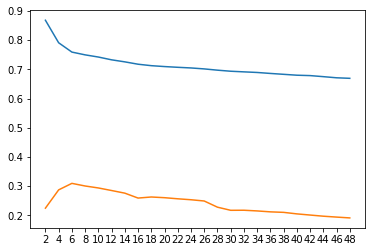

In [22]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n);

In [23]:
# MODELO learning_curve
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)
samples, train, test = lc[0], lc[1], lc[2]

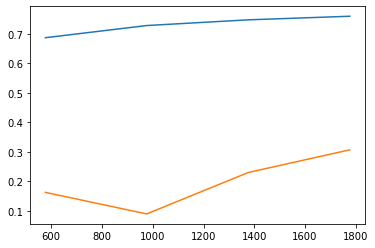

In [24]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])

---

<img src="img/learning_curve.png" width=500>

El modelo aún está aprendiendo, sin embargo no tenemos como obtener datos adicionales.

** Como solucionar el overfitting y el underfitting?**

Viarianza Alta:

- Conseguir más ejemplos
- Reducir cantidad de features
- Aumentar coeficiente de regularización

Bias Alto:

- Más features
- Modelo más complejo

Mal resultado general:

- Probar otro algoritmo/familia de modelos, quizás las hipotesis del modelo no son cumplidad por tu dataset